In [1]:
from __future__ import division
from utils import *
from functions import *
from numba import autojit
%matplotlib inline

%load_ext autoreload
%autoreload 2

today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000 - PhD/figures/"+todayStr+"/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)

In [42]:
'''
SINGLE NEURON FREQUENCY RESPONSE
'''
T = 2000
dt = 1
t = np.arange(0,T,dt)
F = np.logspace(0.5,2.3,200)

@autojit
def resonance(F, model = 'cc'):
    res_var = np.empty(len(F), dtype=np.float64)
    b = 2
    for k,f in enumerate(F):
        A = 0.01
        I = A*np.cos(2*np.pi*f*t/1000)
        res_v = []
        res_u = []
        u=0
        t_rest=0
        if model == 'izh':
            v = -65
            for i in range(len(t)):
                v += dt/20 * ( (v+60)*(v+50) - 20000*u + 30*I[i])
                u += dt * 0.2 * ( 0.025 * (v +55)**3*(v>-55) - u)
                if v>25:
                    v = -45
                if i*dt>1500:
                    res_v.append(v/A)
        elif model == 'gp-izh':
            v = -60
            for i in range(len(t)):
                v += dt/15 * ( (v+60)*(v+50) - 20*u + 8*I[i])
                u += dt * 0.044 * ( (v +55) - u)
                if v>25:
                    v = -40
                    u += 50
                if i*dt>1500:
                    res_v.append(v/A)
        elif model == 'gp-izh30':
            v = -60
            for i in range(len(t)):
                v += dt/65 * ( (v+60)*(v+50) - 20*u + 8*I[i])
                u += dt * 0.044 * ( (v +55) - u)
                if v>25:
                    v = -40
                    u += 50
                if i*dt>1500:
                    res_v.append(v/A)
                    
        elif model == 'cc-tchu': 
            v = -65
            u = 0
            for i in range(len(t)):
                v += dt/100 * ( -v + -20*u + 30*I[i] );     
                u += dt/20 * ( -u + 4.5*v );
                if i*dt>1500:
                    res_v.append(v)
        elif model == 'TRN':
            v = -60
            for i in range(len(t)):
                v += dt/40 * ( 0.25*(v**2 + 110*v +45*65) - 2000*u + 0.01*I[i])
                u += dt * 0.015 * (b* (v +65) - u)
                if v>0:
                    v = -55
                    u += 50
                b = 10 * (v<-70) + 2*(v>=70)
                if i*dt>1500:
                    res_v.append(v/A)
                    
        elif model == 'TRN2':
            v = -60
            for i in range(len(t)):
                v += dt/80 * ( 0.25*(v**2 + 110*v +45*65) - 2000*u + 0.01*I[i])
                u += dt * 0.015 * (b* (v +65) - u)
                if v>0:
                    v = -55
                    u += 50
                b = 10 * (v<-70) + 2*(v>=70)
                if i*dt>1500:
                    res_v.append(v/A)
                    
        elif model == "IAF":
            v = 0
            for i in range(len(t)):
                if t[i] > t_rest:
                    v = v + (-v + I[i]*1) / 10 * dt
                if v >= 1:
                    v += 0.5
                    t_rest = t[i] + 4
                if i*dt>1500:
                    res_v.append(v/A)
            
        var = np.var(res_v)
#         var = np.max(res_v)-np.min(res_v)
        res_var[k] = var
    return res_var


@autojit
def resonanceFS(F,tauv=15):
    res_var = np.empty(len(F), dtype=np.float64)
    b = 2
    for k,f in enumerate(F):
        A = 0.01
        I = A*np.cos(2*np.pi*f*t/1000)
        res_v = []
        res_u = []
        u=0
        t_rest=0
        
        # izh neuron model for cortical fast spiking neurons (that burst)
        v = -60
        for i in range(len(t)):
            v += dt/tauv * ( (v+60)*(v+50) - 20*u + 8*I[i])
            u += dt * 0.044 * ( (v +55) - u)
            if v>25:
                v = -40
                u += 50
            if i*dt>1500:
                res_v.append(v/A)
 
            
        var = np.var(res_v)
#         var = np.max(res_v)-np.min(res_v)
        res_var[k] = var
    return res_var


# models = ['TRN','cc-izh', 'izh', 'mod1', 'cc-tchu']
models = ['gp-izh', 'cc-tchu']
# models = ['cc-tchu']
c = 0
# fig = plt.figure(figsize=(10,10))
# for model in models:
#     c+=1
#     ax = fig.add_subplot(110+1)
#     ax.semilogx(F, resonance(F, model))
#     ax.set_title('Inhibitory Response function '+model)
#     ax.set_ylabel('Response Function')
#     ax.set_xlabel('Frequency [Hz]')
# plt.tight_layout()
# plt.savefig(DIRECTORY + model +'_.pdf')

In [45]:
gpizh = resonanceFS(F)
taulist = np.arange(15,105,10)
modres = [resonanceFS(F,tauv=tauvi) for tauvi in taulist ]
colors = np.linspace(3368652,13382451, len(modres))
gpizh2 = resonanceFS(F, tauv=45)
# trn2 = resonance(F, 'TRN2')
# izh = resonance(F, 'izh')
# iaf = resonance(F, 'IAF')
# x,y = readDataFile('/Users/GP1514/Dropbox/0000 - PhD/post-ESA/FS.txt')
# x_rs,y_rs = readDataFile('/Users/GP1514/Dropbox/0000 - PhD/post-ESA/RS.txt')

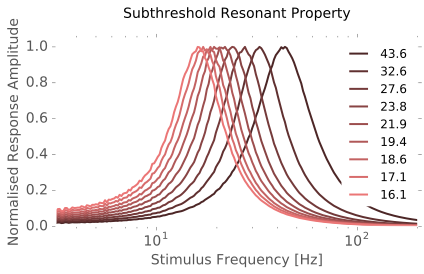

In [95]:
fontsize=14



matplotlib.rc('xtick', labelsize=fontsize)
matplotlib.rc('ytick', labelsize=fontsize)
matplotlib.rc('axes', labelsize = fontsize)
matplotlib.rc('axes', titlesize = fontsize)
matplotlib.rc('lines', linewidth=2)
matplotlib.rc('axes', facecolor = "white")

plt.figure(figsize=(6,4))
for i,mod in enumerate(modres):
    plt.semilogx(F, mod/np.nanmax(mod), label='%.1f'%(F[np.argmax(mod)]), color=colorsys.hsv_to_rgb(1, 0.5, 0.3 + i/len(modres)*0.7))

# plt.semilogx(F, gpizh2/np.nanmax(gpizh2), label='%.1f'%(F[np.argmax(gpizh2)]), color='#3366cc')
# plt.semilogx(F, gpizh/np.nanmax(gpizh), label='%.1f'%(F[np.argmax(gpizh)]), color="#cc3333")
# plt.semilogx(F, cc/np.max(cc), '--', label='Tchumatchenko 2014')
# plt.semilogx(F, izh/np.max(izh), '--', label='Izhikevich 2003')
# plt.plot(x,y/np.max(y), 'k-', markersize=10, label='Cardin 2009 FS PV-Cre')
# plt.plot(x,y/np.max(y), 'k.', markersize=10)
plt.ylim([0,1.05])
# plt.legend()
plt.xlabel('Stimulus Frequency [Hz]')
plt.ylabel('Normalised Response Amplitude')
plt.xlim([0,200])
plt.title('Subthreshold Resonant Property', y=1.08)
plt.legend()
plt.tight_layout()
plt.savefig(DIRECTORY+'_resonanceTRN.pdf')


# plt.figure(figsize=(6,4))
# plt.semilogx(F, gp/np.max(gp), label='our model', color='#3366cc')
# plt.semilogx(F, cc/np.max(cc), '--', label='Tchumatchenko 2014')
# plt.semilogx(F, izh/np.max(izh), '--', label='Izhikevich 2003')
# plt.plot(x,y/np.max(y), 'k-', markersize=10, label='Cardin 2009 FS PV-Cre')
# plt.plot(x,y/np.max(y), 'k.', markersize=10)
# plt.ylim([0,1.05])
# # plt.legend()
# plt.xlabel('Stimulus Frequency [Hz]')
# plt.ylabel('Norm. Response Amplitude')
# plt.xlim([0,200])
# plt.title('Subthreshold Resonant Property')
# plt.tight_layout()
# plt.savefig(DIRECTORY+'_resonance_suppl.pdf')

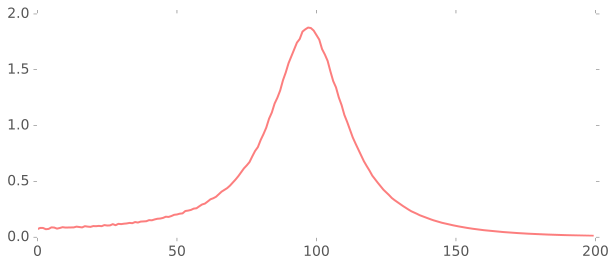

In [89]:
import colorsys
plt.plot(gpizh2, color=colorsys.hsv_to_rgb(1, 0.5, 0.99))

In [53]:
np.arange(15,105,10)

array([15, 25, 35, 45, 55, 65, 75, 85, 95])

In [65]:
"#%0.6X" % 3368652

'#3366CC'

In [57]:
strHex

'0x0000FF'

In [68]:
int(0xcc3333)

13382451